# Decision Trees

_These are more algortihm based models rather than statistical._

## 1. Classification

In [14]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)
X_train.shape

(120, 4)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

[Text(0.5416666666666666, 0.9285714285714286, 'X[3] <= 0.7\ngini = 0.666\nsamples = 120\nvalue = [38, 40, 42]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 40, 42]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[2] <= 5.35\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 4.95\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'X[2] <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.5833

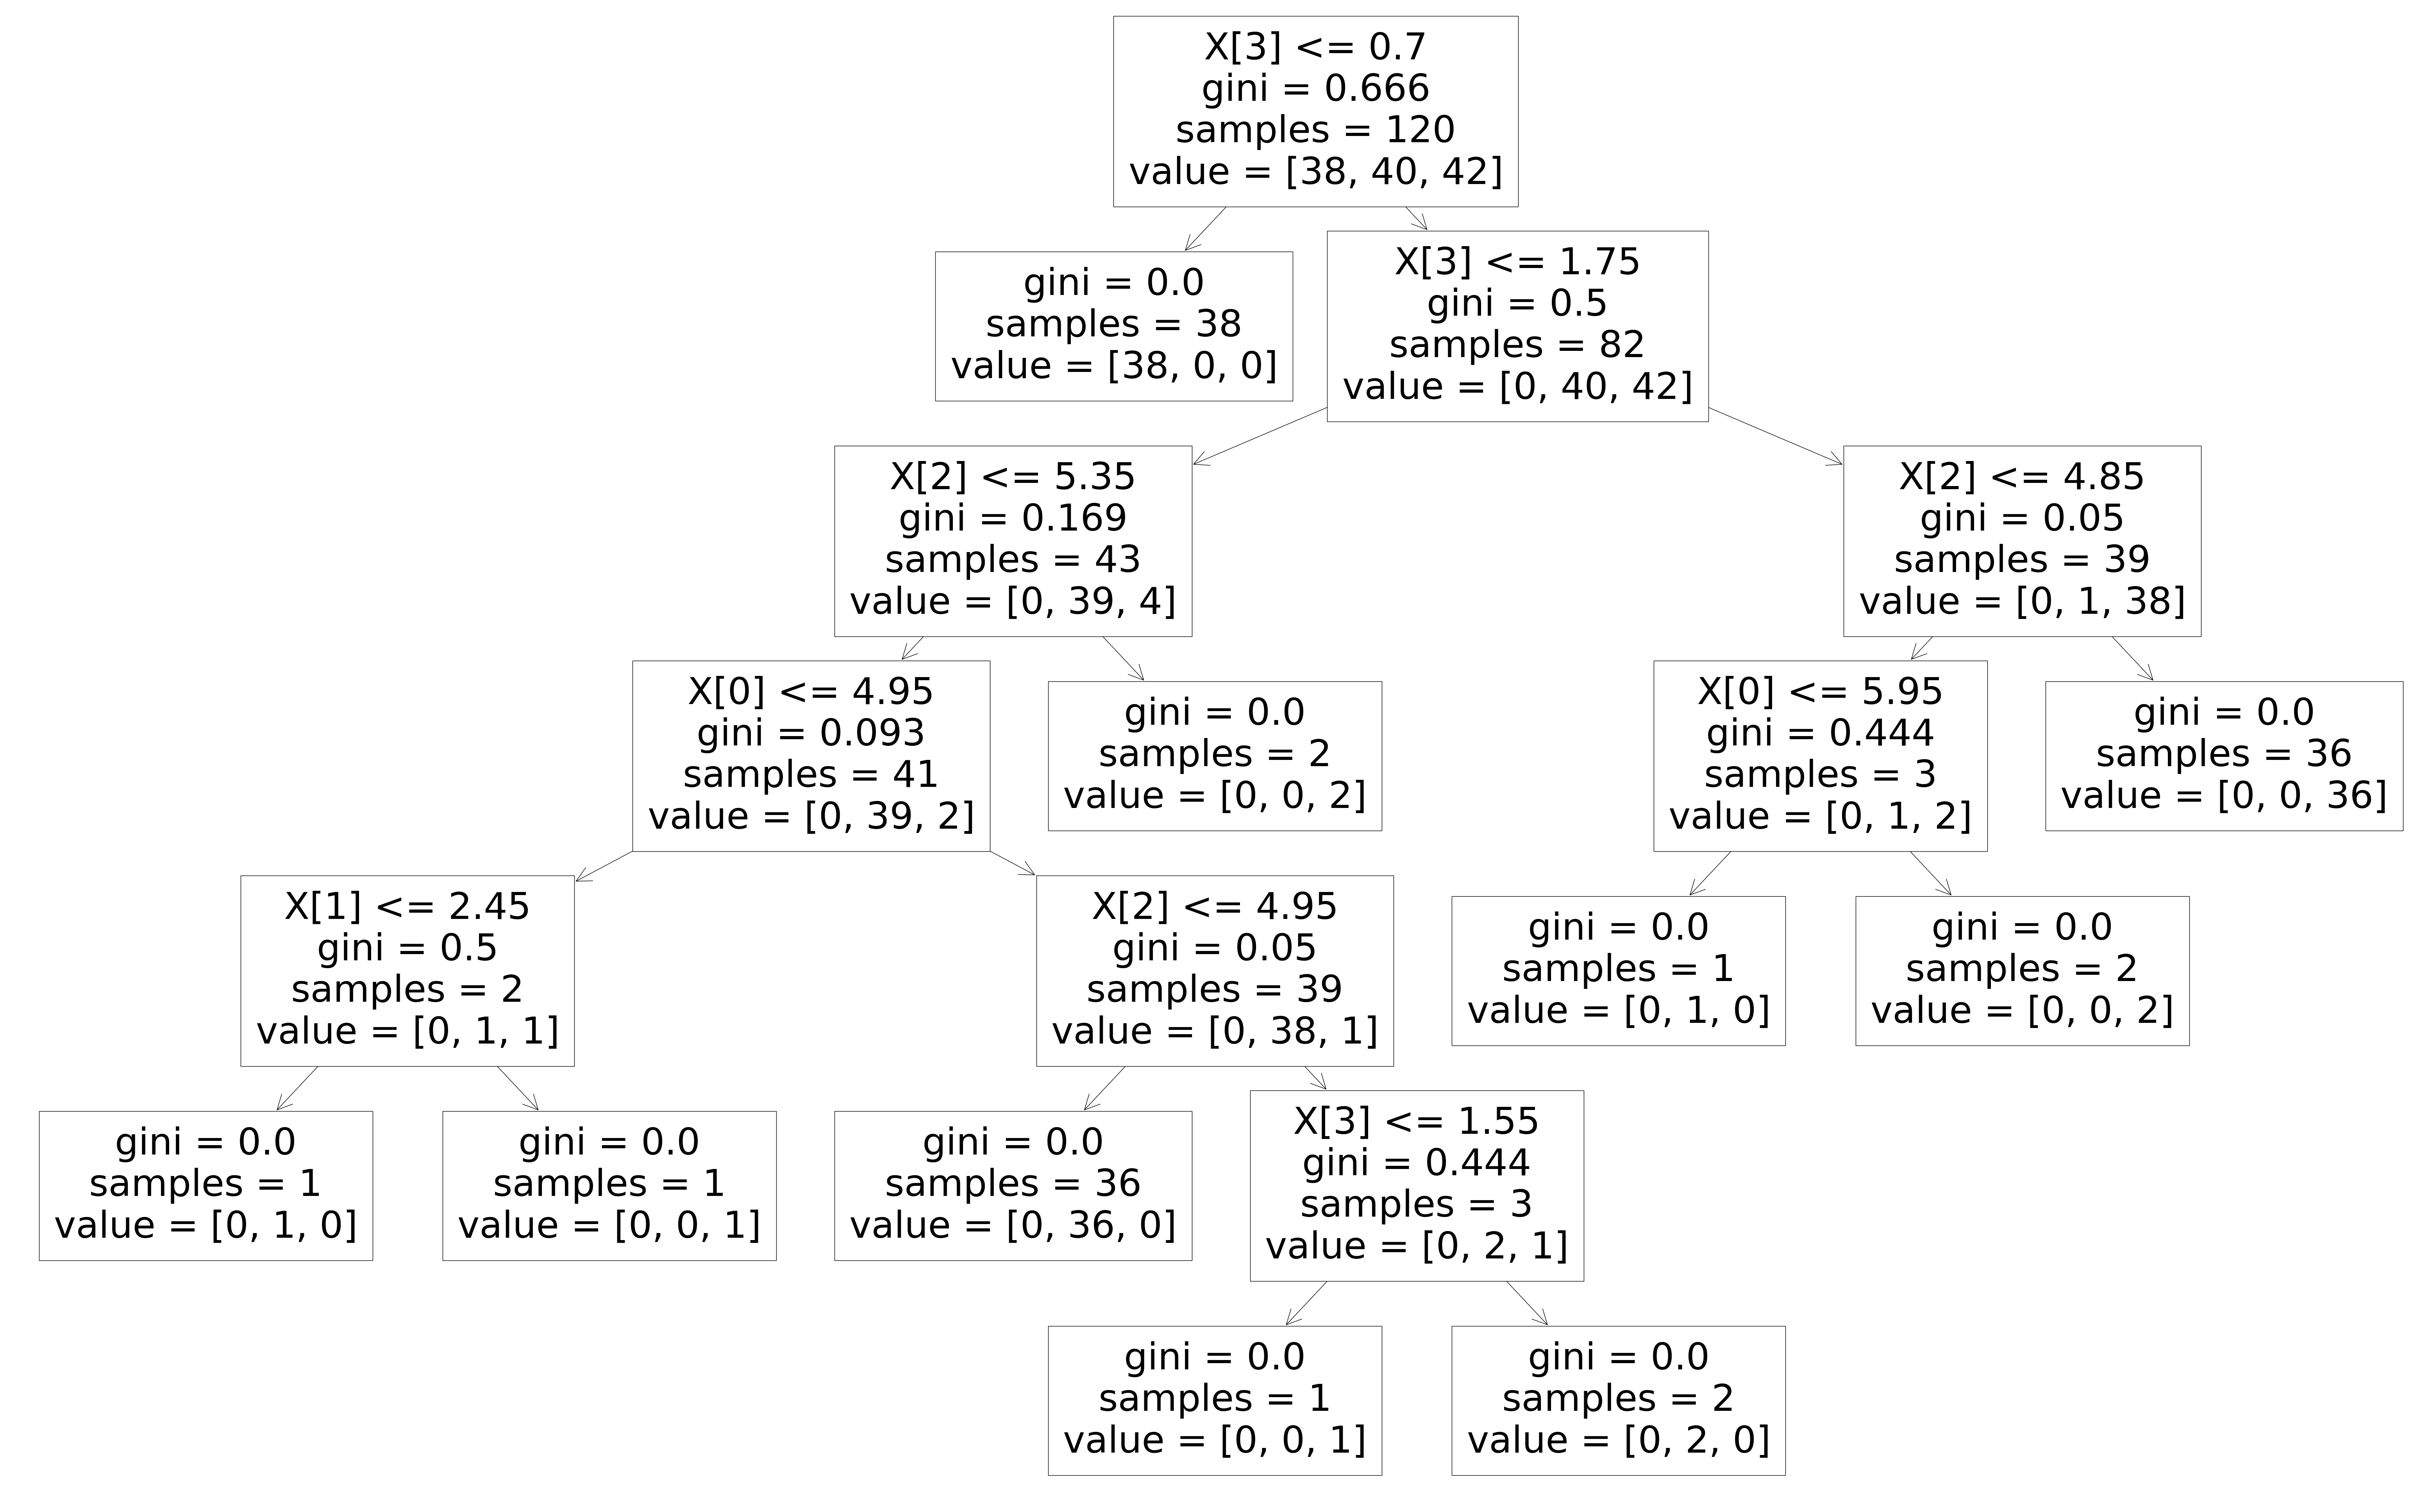

In [18]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(clf)

In [19]:
import numpy as np
import pandas as pd
data=pd.read_csv('data/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)
X=data.iloc[:, 1:4].values
y=data.iloc[:,-1].values
X.shape

(400, 3)

In [21]:
clf1=DecisionTreeClassifier(max_depth=3)
clf1.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.625, 'X[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239, 46]'),
 Text(0.125, 0.375, 'X[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1875, 0.125, 'gini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.375, 0.375, 'X[2] <= 119000.0\ngini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.75, 0.625, 'X[1] <= 46.5\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.625, 0.375, 'X[2] <= 35500.0\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6875, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.875, 0.375, 'X[2] <= 41500.0\ngini = 0.196\nsamples = 91\nvalue = [10, 81]

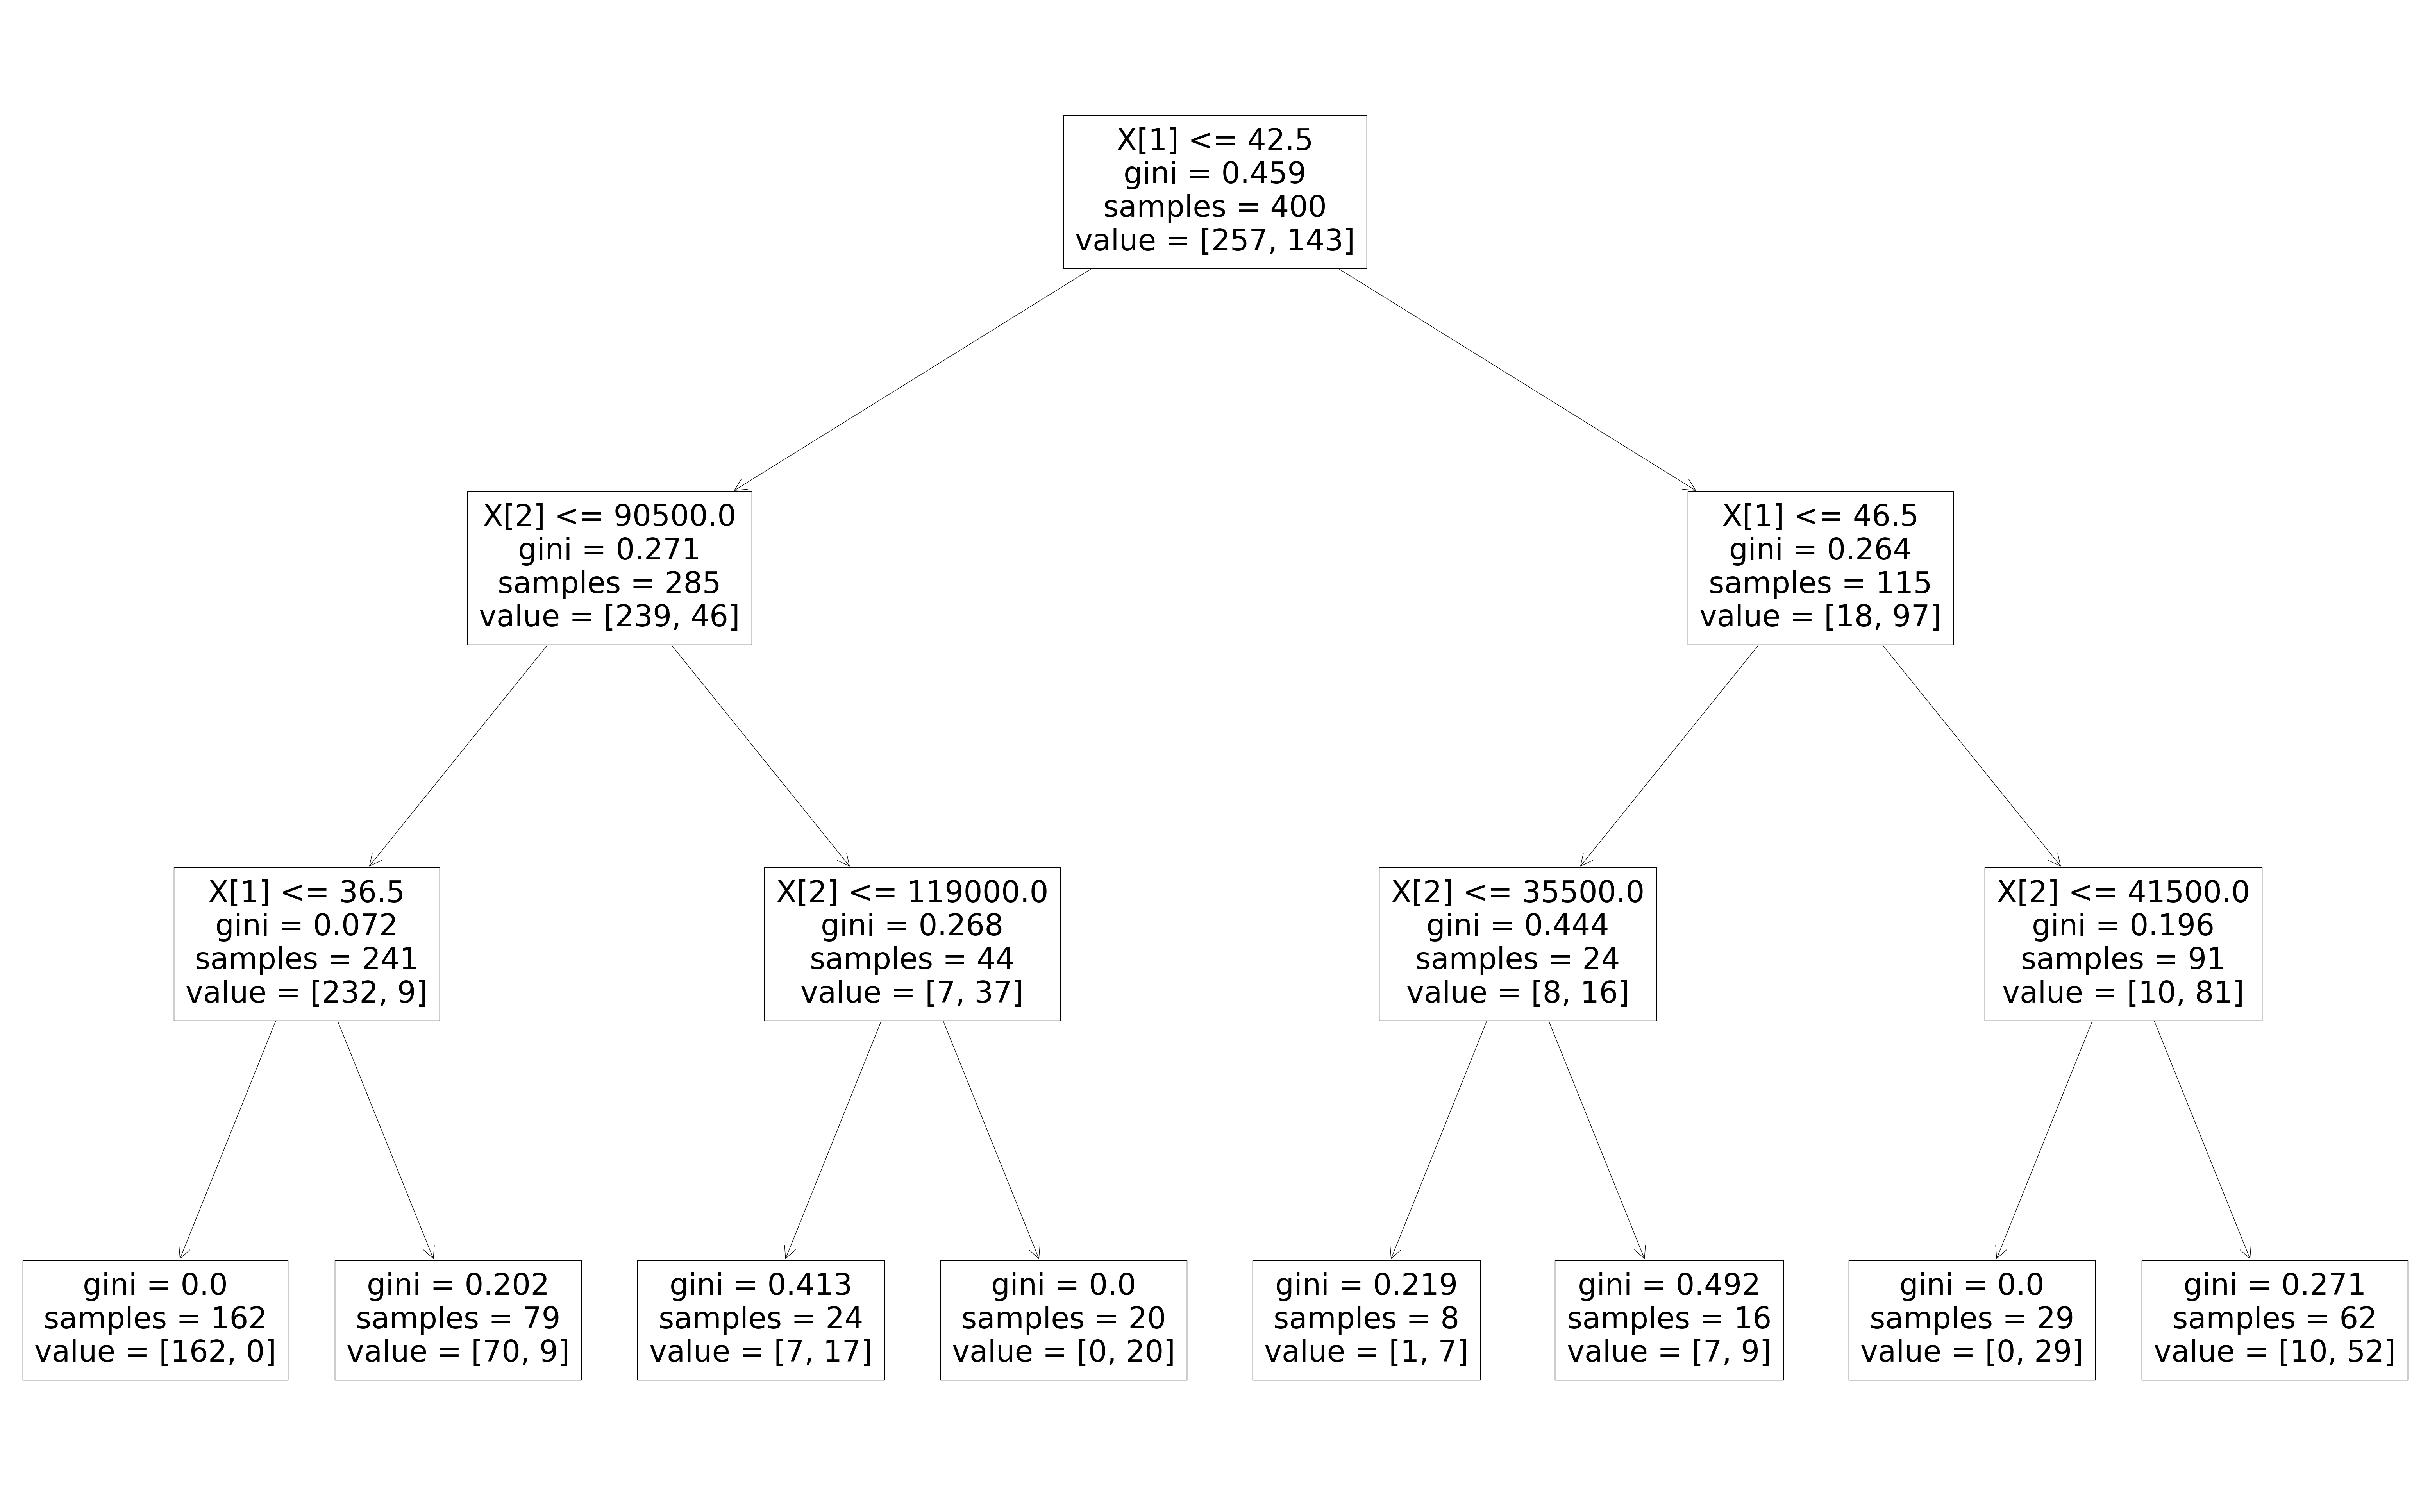

In [22]:
rcParams['figure.figsize'] = 80,50

plot_tree(clf1)

## 2. Regression

In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
     

boston = load_boston()
df = pd.DataFrame(boston.data)
     

df.columns = boston.feature_names
df['MEDV'] = boston.target
     

df.head()

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]
     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
     

rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
     

rt.fit(X_train,y_train)
     

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=5)

In [27]:
y_pred = rt.predict(X_test)
     

r2_score(y_test,y_pred)

0.7937140365309365

_Hyperparameter tuning!_

In [28]:

param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
     

reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
     

reg.fit(X_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` wh

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [29]:
reg.best_score_

0.6400594054776116

In [30]:
reg.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}